# Backend API Testing and Analysis

We are testing the REST API developed in NestJS; analyzing performance and integration with PostgreSQL.

### Objectives:
- Verify API connection and responses
- Test adding new data
- Analyze query performance
- Confirm correct integration with the PostgreSQL database


In [34]:
%pip install requests pandas matplotlib seaborn faker psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import time
import psycopg2


Now, start the NestJS API in a terminal:

```bash
npm run start:dev
```

## Defining API Connection Parameters

In [36]:
# API URL
BASE_URL = "http://localhost:3000/users"

## Checking API Connection

In [37]:
# Test GET endpoint (retrieve users)
response = requests.get(BASE_URL)
print("GET Status:", response.status_code)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())  # Display first 5 users


GET Status: 200
   id   firstName   lastName                             email  \
0   1       Lonny      Blick               Horacio64@yahoo.com   
1   2     Mikayla     Kemmer                 Yasmin1@gmail.com   
2   3       Mable     Marvin        Giuseppe_Corwin9@gmail.com   
3   4  Marjolaine      Swift           Lelah_Okuneva@gmail.com   
4   5      Celine  Bergstrom  Jennifer.Keebler-Brown@gmail.com   

          password  
0  1roB53FZYigd_KV  
1  AL2pQutBREPYfQq  
2  m9p9OTCKepxDwCW  
3  GSyco4296QTMQMP  
4  XnxgCYDL5KLvzj9  


## Adding a User via API

In [38]:
# Create a new user with Faker
fake = Faker()
user_data = {
    "firstName": fake.first_name(),
    "lastName": fake.last_name(),
    "email": fake.unique.email(),
    "password": fake.password()
}

post_response = requests.post(BASE_URL, json=user_data)
print("POST Status:", post_response.status_code)

if post_response.status_code == 201:
    print("User added:", post_response.json())


POST Status: 201
User added: {'id': 202, 'firstName': 'Erin', 'lastName': 'Baker', 'email': 'schwartznicole@example.net', 'password': 'j2VnXf(i(7'}


## Query Performance Analysis

In [39]:
# Execute 100 GET requests and measure response time
durations = []
for _ in range(100):
    start = time.time()
    requests.get(BASE_URL)
    durations.append(time.time() - start)


### Visualizing GET Request Response Times

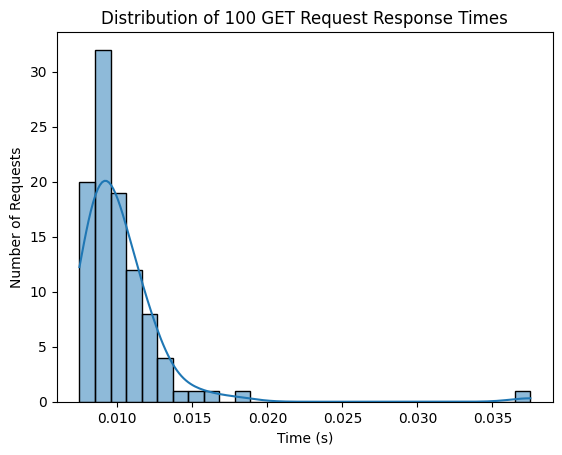

In [40]:
sns.histplot(durations, kde=True)
plt.title("Distribution of 100 GET Request Response Times")
plt.xlabel("Time (s)")
plt.ylabel("Number of Requests")
plt.show()


## Verifying Data Directly in PostgreSQL

In [41]:
# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port=5432,
    user="postgres",
    password="postgres",
    database="mydb"
)

cur = conn.cursor()
cur.execute("SELECT COUNT(*) FROM \"user\";")
user_count = cur.fetchone()
print("Total number of users in the database:", user_count[0])

cur.close()
conn.close()


Total number of users in the database: 202
